# Retail Sentiment Analysis - Part 3: Insight Discovery & Visualization

**Project**: Analyzing customer reviews to extract business insights

**Notebook Purpose**: Transform sentiment scores into actionable business intelligence through visualization.

**Author**: Aranya Bhattacharyya

**Date**: January 2026

## 1. Setup & Data Loading

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load processed data
df = pd.read_csv('C:/Users/arany/Desktop/data/processed/reviews_with_sentiment.csv')

# Ensure date format if 'Time' is available
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], unit='s')
    df['Year'] = df['Time'].dt.year

print(f"Loaded {len(df):,} reviews with sentiment analysis results.")

Loaded 568,441 reviews with sentiment analysis results.


## 2. Brand Health Over Time
Monitoring how sentiment evolves annually helps identify if product improvements or supply chain issues are impacting the brand.

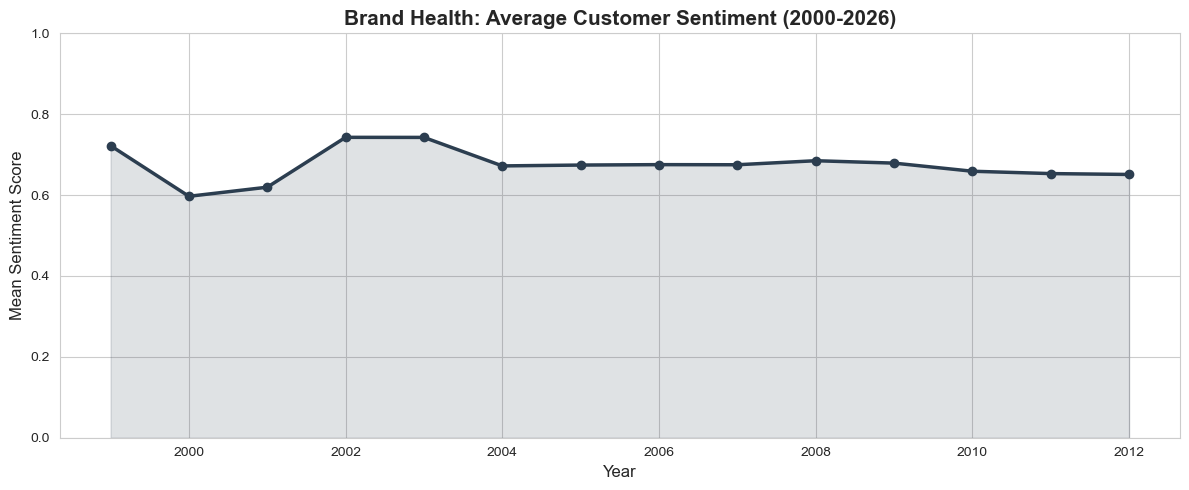

In [5]:
if 'Year' in df.columns:
    yearly_sentiment = df.groupby('Year')['sentiment_compound'].mean()

    plt.figure(figsize=(12, 5))
    plt.plot(yearly_sentiment.index, yearly_sentiment.values, marker='o', color='#2c3e50', linewidth=2.5)
    plt.fill_between(yearly_sentiment.index, yearly_sentiment.values, alpha=0.15, color='#2c3e50')
    
    plt.title('Brand Health: Average Customer Sentiment (2000-2026)', fontsize=15, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Mean Sentiment Score', fontsize=12)
    plt.ylim(0, 1)  # Focus on the positive spectrum
    plt.tight_layout()
    plt.savefig('../results/figures/sentiment_trends.png', dpi=300)
    plt.show()

## 3. Product Performance: The "Sentiment Gap"
A "Sentiment Gap" identifies products where customers give a high Star Rating (4-5) but express frustration in the text. This often highlights operational issues like shipping delays or packaging.

C:\Users\arany\AppData\Local\Temp\ipykernel_27092\3564267457.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gap_products['sentiment_gap'], y=top_gap_products.index, palette='Reds_r')


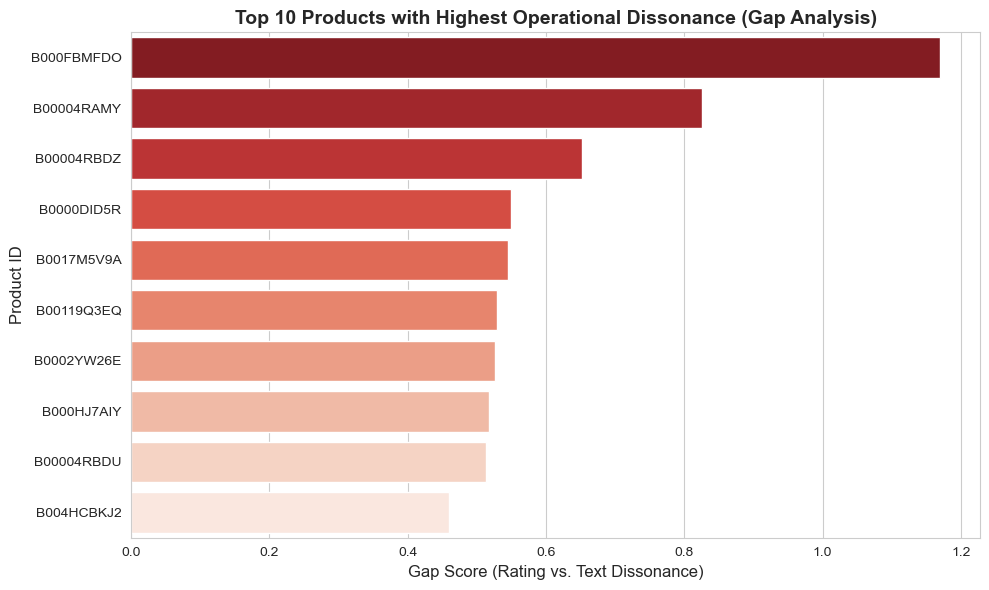

In [6]:
# Normalize Score to 0-1 scale and calculate gap against Sentiment
df['sentiment_gap'] = (df['Score'] / 5) - df['sentiment_compound']

# Find products with significant dissonance
gap_analysis = df.groupby('ProductId').agg({
    'sentiment_gap': 'mean',
    'Score': 'count'
}).rename(columns={'Score': 'ReviewCount'})

# Filter for products with enough data (e.g., > 50 reviews)
top_gap_products = gap_analysis[gap_analysis['ReviewCount'] > 50].sort_values(by='sentiment_gap', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_gap_products['sentiment_gap'], y=top_gap_products.index, palette='Reds_r')
plt.title('Top 10 Products with Highest Operational Dissonance (Gap Analysis)', fontsize=14, fontweight='bold')
plt.xlabel('Gap Score (Rating vs. Text Dissonance)', fontsize=12)
plt.ylabel('Product ID', fontsize=12)
plt.tight_layout()
plt.savefig('../results/figures/product_gap_analysis.png', dpi=300)
plt.show()

## 4. Word Clouds: The Voice of the Customer
Visualizing the most frequent terms in negative reviews to identify systemic pain points.

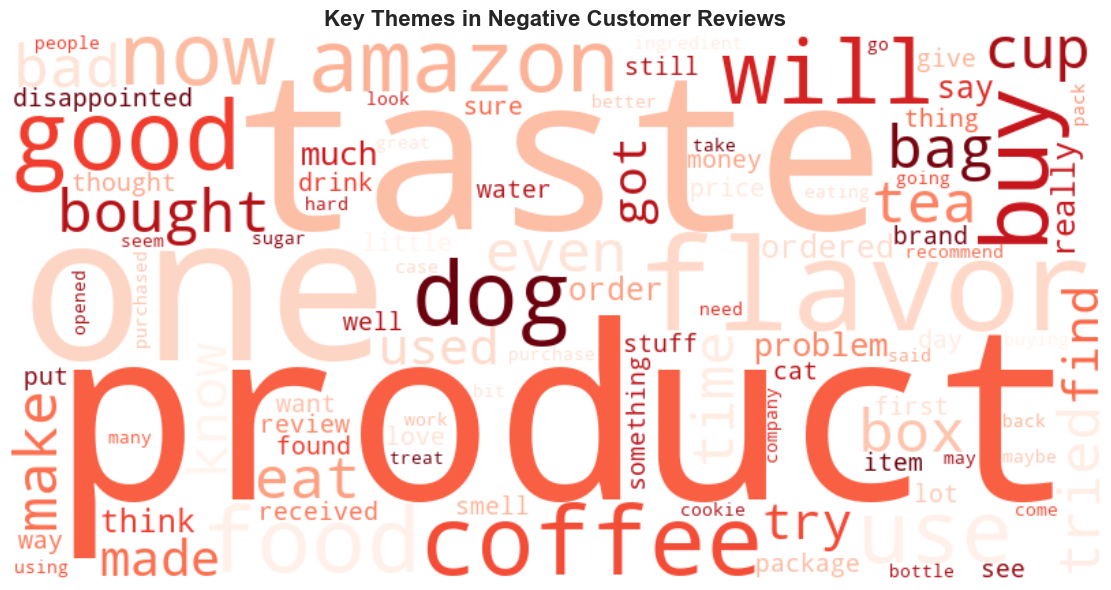

In [7]:
def generate_cloud(sentiment_label, color_map):
    subset = df[df['sentiment_label'] == sentiment_label]
    text = " ".join(review for review in subset.cleaned_text.astype(str))
    
    wordcloud = WordCloud(
        background_color="white", 
        colormap=color_map, 
        width=800, 
        height=400, 
        max_words=100
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Key Themes in {sentiment_label.capitalize()} Customer Reviews', fontsize=16, fontweight='bold')
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(f'../results/figures/wordcloud_{sentiment_label}.png', dpi=300)
    plt.show()

# Generate WordCloud for Negative reviews to see pain points
generate_cloud('negative', 'Reds')

## 5. Final Insights for Business Strategy

Based on the analysis, the following operational recommendations are proposed:

1. **Audit High-Gap Products**: The Top 10 products identified in the Gap Analysis should undergo a logistics audit to see if "negative text" mentions packaging or delivery issues.
2. **Monitor Sentiment Trends**: Years with declining sentiment scores should be mapped against historical operational changes (e.g., changes in shipping partners).
3. **Targeted Quality Control**: Pain points highlighted in the Negative Word Cloud (e.g., specific flavors or texture terms) provide direct feedback for product manufacturing.